# Introduction to NumPy

In [1]:
import numpy as np
np.__version__ 

'1.14.0'

In [3]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [4]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [5]:
x1[:,np.newaxis]

array([[0],
       [8],
       [1],
       [2],
       [4],
       [2]])

### concatenation

In [6]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [7]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Splitting of arrays

In [8]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [9]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [10]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [11]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Universal Functions

In [12]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [13]:
big_array = np.random.randint(1,100,size = 1000000)
%timeit compute_reciprocals(big_array)

1.72 s ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit (1.0/big_array)

3.84 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
x = np.array([3-4j, 4-3j, 0+1j])
np.abs(x)

array([5., 5., 1.])

In [17]:
x = np.arange(5)
y = np.empty(5)
np.power(2, x, out = y)
print(y)

[ 1.  2.  4.  8. 16.]


In [18]:
print(np.add.accumulate(x))
print(np.multiply.outer(x,x))

[ 0  1  3  6 10]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]


## Aggregations: Min, Max, and Everything In Between

In [19]:
L = np.random.random(1000000)
%timeit sum(L)
%timeit np.sum(L)
%timeit L.sum()

127 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.19 ms ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.16 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit min(L)
%timeit np.min(L)

51.8 ms ± 582 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
448 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
M = np.random.random((3,4))
print(M.sum())
print(M.sum(axis = 0))
print(M.sum(axis = 1))

5.263590187910373
[1.33444286 1.67391123 1.28054385 0.97469225]
[1.82741237 2.60924208 0.82693574]


In [23]:
M

array([[0.23956676, 0.87236336, 0.36038331, 0.35509894],
       [0.63857126, 0.71866774, 0.76571011, 0.48629296],
       [0.45630483, 0.08288013, 0.15445043, 0.13330035]])

### Example: What is the Average Height of US Presidents?

In [25]:
heights = np.array([189,170,189,163,183,171,185,168,173,183,173,173,175,178,183,193,178,173
,174,183,183,168,170,178,182,180,183,178,182,188,175,179,183,193,182,183
,177,185,188,188,182,185])
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

seaborn的绘图风格

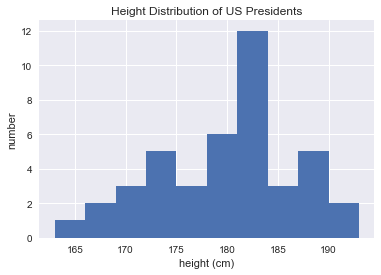

In [27]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Broadcast

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function z=f(x,y), broadcasting can be used to compute the function across the grid:

In [34]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:,np.newaxis]

z = np.sin(x)**10 + np.cos(10 + x*y) * np.cos(x)
z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

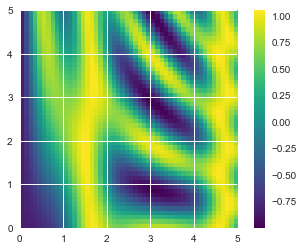

In [36]:
import matplotlib.pyplot as plt

plt.imshow(z, origin = 'lower',extent = [0,5,0,5], cmap = 'viridis')
plt.colorbar()

## Comparisons, Masks, and Boolean Logic

In [37]:
x = np.random.randint(0,10,size=(3,4))
x

array([[8, 1, 1, 7],
       [4, 5, 8, 3],
       [7, 2, 2, 3]])

In [38]:
np.count_nonzero(x < 6)

8

## Fancy Indexing

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [40]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)

ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [42]:
mean = [0,0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

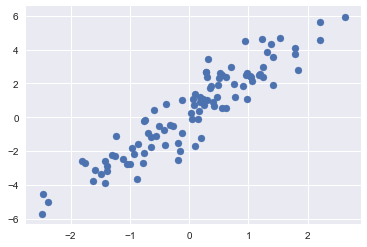

In [43]:
plt.scatter(X[:,0], X[:,1])

[94 95 85 56 23 10 40  2  0 41 60  4 64 19 48 36 50  7 43 90]
(20, 2)


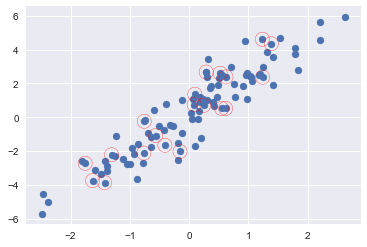

In [50]:
indices = np.random.choice(X.shape[0], 20, replace = False)
print(indices)
selection = X[indices]
print(selection.shape)
plt.scatter(X[:,0], X[:,1])
plt.scatter(selection[:,0],selection[:,1], facecolor = 'none',edgecolors='r', s = 200)

In [52]:
np.searchsorted?

In [53]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

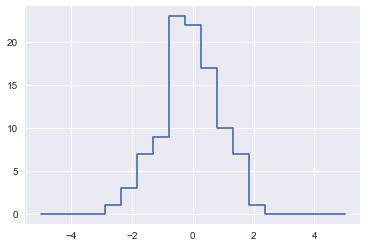

In [54]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

(-1, 25)

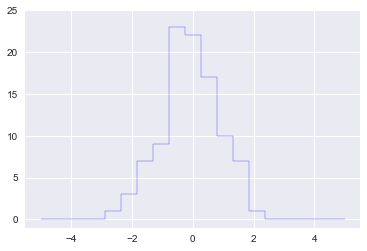

In [56]:
plt.hist(x, bins, histtype='step', color='b')
plt.ylim([-1, 25])

## Sorting Arrays

In [57]:
#Partial Sorts: Partitioning
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

### Example: k-Nearest Neighbors

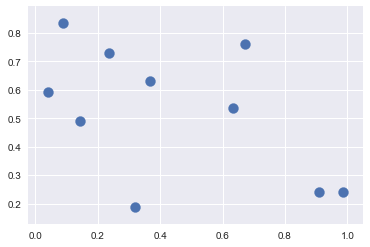

In [59]:
X = np.random.rand(10, 2)
plt.scatter(X[:,0], X[:,1], s = 100)

In [60]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.64518075, 0.00599459, 0.3283018 , 0.68852555,
        0.44636941, 0.16322198, 1.02399179, 0.34795319, 0.8759737 ],
       [0.64518075, 0.        , 0.76807547, 0.35205753, 0.06560925,
        0.07008618, 0.24090973, 0.12259376, 0.12270476, 0.02113103],
       [0.00599459, 0.76807547, 0.        , 0.3682387 , 0.79587591,
        0.53405553, 0.21026011, 1.15361302, 0.44513697, 1.01447708],
       [0.3283018 , 0.35205753, 0.3682387 , 0.        , 0.18990429,
        0.10935245, 0.05249634, 0.34397368, 0.45419196, 0.42776356],
       [0.68852555, 0.06560925, 0.79587591, 0.18990429, 0.        ,
        0.0261367 , 0.1937644 , 0.03317881, 0.30034923, 0.05761252],
       [0.44636941, 0.07008618, 0.53405553, 0.10935245, 0.0261367 ,
        0.        , 0.07993951, 0.11821021, 0.20093562, 0.10864925],
       [0.16322198, 0.24090973, 0.21026011, 0.05249634, 0.1937644 ,
        0.07993951, 0.        , 0.38482654, 0.21979222, 0.354396  ],
       [1.02399179, 0.12259376, 1.1536130

In [61]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 6 3 8 5 1 4 9 7]
 [1 9 4 5 7 8 6 3 0 2]
 [2 0 6 3 8 5 1 4 9 7]
 [3 6 5 4 0 7 1 2 9 8]
 [4 5 7 9 1 3 6 8 0 2]
 [5 4 1 6 9 3 7 8 0 2]
 [6 3 5 0 4 2 8 1 9 7]
 [7 4 9 5 1 3 6 8 0 2]
 [8 1 5 6 9 4 0 2 3 7]
 [9 1 4 7 5 8 6 3 0 2]]


In [62]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

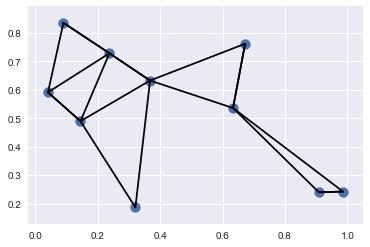

In [63]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')